# Experiments with Dynamic Time Warping and K-Nearest Neighbors

Importing libraries:

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from utils import get_clf_report_dfs, plot_confusion_matrix

Defining constants:

In [2]:
RANDOM_SEED=42
MODEL_NAME="DTW"
RESULTS_DIR=f"./results/{MODEL_NAME}"
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)
np.random.seed(RANDOM_SEED)

Loading the data:

In [3]:
data = np.load('./dataset/dataset.npz')
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']
y_mapping = data['y_mapping']

Training a K-NN model with DTW distance and tuning hyperparameters via grid search, using validation accuracy for model selection:

In [4]:
param_grid = {
    'n_neighbors': [1, 3, 5, 9, 15], # odd values to avoid ties
    'weights': ['uniform', 'distance']
}

trials = [] 
best_score = 0.0
best_model = None
for k in param_grid["n_neighbors"]:
    for weight in param_grid["weights"]:
        print(f"Training with n_neighbors={k}, weights={weight}")
        clf = KNeighborsTimeSeriesClassifier(n_neighbors=k, weights=weight, metric='dtw')
        clf.fit(X_train, y_train)
        val_preds = clf.predict(X_val)
        acc = accuracy_score(y_val, val_preds)
        trials.append({
            'n_neighbors': k,
            'weights': weight,
            'accuracy': acc
        })
        if acc > best_score:
            best_score = acc
            best_model = clf

trials_df = pd.DataFrame(trials).sort_values(by='accuracy', ascending=False)
trials_df.style.background_gradient(cmap='Blues', subset=['accuracy'])

Training with n_neighbors=1, weights=uniform


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training with n_neighbors=1, weights=distance


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training with n_neighbors=3, weights=uniform


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training with n_neighbors=3, weights=distance


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training with n_neighbors=5, weights=uniform


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training with n_neighbors=5, weights=distance


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training with n_neighbors=9, weights=uniform


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training with n_neighbors=9, weights=distance


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training with n_neighbors=15, weights=uniform


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training with n_neighbors=15, weights=distance


/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,n_neighbors,weights,accuracy
0,1,uniform,0.837500
1,1,distance,0.837500
3,3,distance,0.762500
2,3,uniform,0.750000
5,5,distance,0.712500
6,9,uniform,0.712500
7,9,distance,0.700000
9,15,distance,0.700000
4,5,uniform,0.687500
8,15,uniform,0.662500


Saving the best model:

In [5]:
file = open(os.path.join(RESULTS_DIR, f"{MODEL_NAME}.pkl"), 'wb')
pickle.dump(obj=best_model, file=file)
file.close()

Displaying model performance on the test set:

In [6]:
y_pred = best_model.predict(X_test)
np.save(os.path.join(RESULTS_DIR, f"{MODEL_NAME}_predictions.npy"), y_pred)

y_test_str = [y_mapping[label] for label in y_test]
y_pred_str = [y_mapping[label] for label in y_pred]

clf_scores_df, per_class_clf_scores_df = get_clf_report_dfs(
    y_true=y_test_str, y_pred=y_pred_str,
    clf_scores_path=os.path.join(RESULTS_DIR, f"{MODEL_NAME}_clf_scores.csv"),
    clf_per_class_scores_path=os.path.join(RESULTS_DIR, f"{MODEL_NAME}_per_class_clf_scores.csv")
)

clf_scores_df

/Users/irenetesta/anaconda3/envs/robotics/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,accuracy,f1-score macro avg,f1-score weighted avg,precision macro avg,precision weighted avg,recall macro avg,recall weighted avg
0,0.802469,0.801356,0.797943,0.827451,0.824809,0.806863,0.802469


In [7]:
per_class_clf_scores_df.style.background_gradient(cmap="Blues")

,precision,recall,f1-score,support
ball,1.000000,0.750000,0.857143,4.000000
bigball,0.750000,0.600000,0.666667,5.000000
box,0.571429,1.000000,0.727273,4.000000
button,0.714286,0.833333,0.769231,6.000000
case,0.750000,0.600000,0.666667,5.000000
cube,0.750000,0.750000,0.750000,4.000000
cylinder,0.600000,0.600000,0.600000,5.000000
empty,1.000000,1.000000,1.000000,5.000000
jenga,0.750000,0.750000,0.750000,4.000000
labello,1.000000,0.800000,0.888889,5.000000


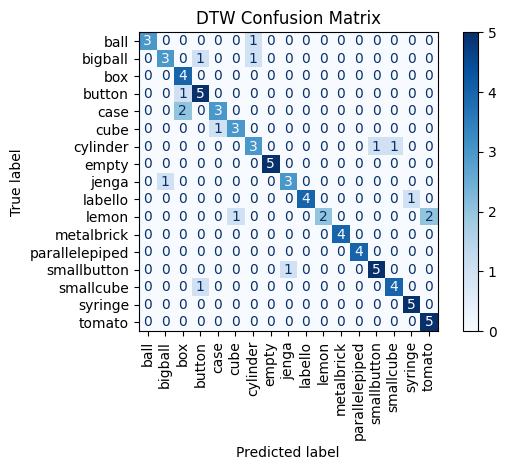

In [8]:
plot_confusion_matrix(
    y_true=y_test_str,
    y_pred=y_pred_str,
    title=f"{MODEL_NAME} Confusion Matrix",
    path=os.path.join(RESULTS_DIR, f"{MODEL_NAME}_confusion_matrix.png")
)